In [2]:
!pip install bs4

In [3]:
import requests as rs
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [4]:
house_name =[]
city_name =[]
price =[]
area_sq_ft =[]
status = []
page = 50
for i in range(1,page):
    url="https://www.makaan.com/chennai-residential-property/buy-property-in-chennai-city?page=5&_=1699974459153".format(i)
    header_requests={"Accept-Encoding":"gzip, deflate, br","User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}
    response = rs.get(url, headers=header_requests)
    html_code = response.text
    soup = BeautifulSoup(html_code)
    container = soup.find_all('div', attrs={'class' :"cardLayout clearfix"})
    for containers in container:
            house = containers.find('div', attrs={'class' : "title-line"})
            if house is None:
                house_name.append(np.NAN)
            else:
                house_name.append(house.text)
            city = containers.find('div', attrs={'class' : "locWrap"})
            if city is None:
                city_name.append(np.NAN)
            else:
                city_name.append(city.text)
            Cost = containers.find('div', attrs={'data-type' : "price-link"})
            if Cost is None:
                price.append(np.NAN)
            else:
                price.append(Cost.text)
            area = containers.find('td', attrs={'class' : "size"})
            if area is None:
                area_sq_ft.append(np.NAN)
            else:
                area_sq_ft.append(area.text)
            house = containers.find('td', attrs={'class' : "val"})
            if house is None:
                status.append(np.NAN)
            else:
                status.append(house.text)

In [5]:
print("Name:", len(house_name))
print("City:", len(city_name))
print("Cost:", len(price))
print("Area:", len(area_sq_ft))
print("Product:", len(status))

Name: 980
City: 980
Cost: 980
Area: 980
Product: 980


In [6]:
df = pd.DataFrame({'no_of_bhk' : house_name, 
                   'address' : city_name, 
                   'price' : price, 
                   'area_sq_ft' : area_sq_ft,
                   'status' : status})

In [7]:
df

,no_of_bhk,address,price,area_sq_ft,status
0,3 BHK Apartment in GP GP Homes Elanza,"Mugalivakkam, Chennai",88.59 L,1305,Ready to move
1,3 BHK Apartment in Sagar Valley,"Sholinganallur, Chennai",88 L,1600,Under Construction
2,2 BHK Apartment in Raunaq Garden Wood,"Pallavaram, Chennai",71.55 L,1068,Ready to move
3,2 BHK Apartment in Hanu Aishwaryam,"Perumbakkam, Chennai",56.9 L,1096,Under Construction
4,2 BHK Apartment in Saradeuz Olympus The Royal ...,"Perumbakkam, Chennai",55.36 L,900,Ready to move
...,...,...,...,...,...
975,3 BHK Villa in VGN Pride De Villa,"Padur, Chennai",1.34 Cr,1692,Under Construction
976,2 BHK Apartment in Silversky Lakeside3,"Puzhal, Chennai",53.07 L,965,Ready to move
977,2 BHK Apartment in Navins Maple Sky Residences...,"Vengaivasal, Chennai",82 L,1002,Ready to move
978,2 BHK Apartment in Doshi Risington 2,"Karapakkam, Chennai",82.89 L,1106,Under Construction


In [8]:
df.shape

(980, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   no_of_bhk   980 non-null    object
 1   address     980 non-null    object
 2   price       980 non-null    object
 3   area_sq_ft  980 non-null    object
 4   status      980 non-null    object
dtypes: object(5)
memory usage: 38.4+ KB


In [10]:
df.tail()

,no_of_bhk,address,price,area_sq_ft,status
975,3 BHK Villa in VGN Pride De Villa,"Padur, Chennai",1.34 Cr,1692,Under Construction
976,2 BHK Apartment in Silversky Lakeside3,"Puzhal, Chennai",53.07 L,965,Ready to move
977,2 BHK Apartment in Navins Maple Sky Residences...,"Vengaivasal, Chennai",82 L,1002,Ready to move
978,2 BHK Apartment in Doshi Risington 2,"Karapakkam, Chennai",82.89 L,1106,Under Construction
979,2 BHK Apartment in Tulive Azpire,"East Tambaram, Chennai",59.17 L,1225,Under Construction


In [11]:
def convert_to_rupees(amount):
    value, unit = amount.split()
    value = float(value)
    if unit == 'Cr':
        return value * 10**7
    elif unit == 'L':
        return value * 10**5
    else:
        return value

In [12]:
df['amount'] = df['price'].apply(convert_to_rupees)

print(df["amount"])

0       8859000.0
1       8800000.0
2       7155000.0
3       5690000.0
4       5536000.0
          ...    
975    13400000.0
976     5307000.0
977     8200000.0
978     8289000.0
979     5917000.0
Name: amount, Length: 980, dtype: float64


In [13]:
df

,no_of_bhk,address,price,area_sq_ft,status,amount
0,3 BHK Apartment in GP GP Homes Elanza,"Mugalivakkam, Chennai",88.59 L,1305,Ready to move,8859000.0
1,3 BHK Apartment in Sagar Valley,"Sholinganallur, Chennai",88 L,1600,Under Construction,8800000.0
2,2 BHK Apartment in Raunaq Garden Wood,"Pallavaram, Chennai",71.55 L,1068,Ready to move,7155000.0
3,2 BHK Apartment in Hanu Aishwaryam,"Perumbakkam, Chennai",56.9 L,1096,Under Construction,5690000.0
4,2 BHK Apartment in Saradeuz Olympus The Royal ...,"Perumbakkam, Chennai",55.36 L,900,Ready to move,5536000.0
...,...,...,...,...,...,...
975,3 BHK Villa in VGN Pride De Villa,"Padur, Chennai",1.34 Cr,1692,Under Construction,13400000.0
976,2 BHK Apartment in Silversky Lakeside3,"Puzhal, Chennai",53.07 L,965,Ready to move,5307000.0
977,2 BHK Apartment in Navins Maple Sky Residences...,"Vengaivasal, Chennai",82 L,1002,Ready to move,8200000.0
978,2 BHK Apartment in Doshi Risington 2,"Karapakkam, Chennai",82.89 L,1106,Under Construction,8289000.0


In [14]:
df.pop("price")

0       88.59 L
1          88 L
2       71.55 L
3        56.9 L
4       55.36 L
         ...   
975     1.34 Cr
976     53.07 L
977        82 L
978     82.89 L
979     59.17 L
Name: price, Length: 980, dtype: object

In [15]:
df

,no_of_bhk,address,area_sq_ft,status,amount
0,3 BHK Apartment in GP GP Homes Elanza,"Mugalivakkam, Chennai",1305,Ready to move,8859000.0
1,3 BHK Apartment in Sagar Valley,"Sholinganallur, Chennai",1600,Under Construction,8800000.0
2,2 BHK Apartment in Raunaq Garden Wood,"Pallavaram, Chennai",1068,Ready to move,7155000.0
3,2 BHK Apartment in Hanu Aishwaryam,"Perumbakkam, Chennai",1096,Under Construction,5690000.0
4,2 BHK Apartment in Saradeuz Olympus The Royal ...,"Perumbakkam, Chennai",900,Ready to move,5536000.0
...,...,...,...,...,...
975,3 BHK Villa in VGN Pride De Villa,"Padur, Chennai",1692,Under Construction,13400000.0
976,2 BHK Apartment in Silversky Lakeside3,"Puzhal, Chennai",965,Ready to move,5307000.0
977,2 BHK Apartment in Navins Maple Sky Residences...,"Vengaivasal, Chennai",1002,Ready to move,8200000.0
978,2 BHK Apartment in Doshi Risington 2,"Karapakkam, Chennai",1106,Under Construction,8289000.0


In [16]:
#Function to extract the leading numeric part
def extract_leading_numeric(value):
    match = re.match(r'^\d+', value)  
    return match.group(0) if match else '' 
df['bhk'] = df['no_of_bhk'].apply(extract_leading_numeric)

In [17]:
df.tail(10)

,no_of_bhk,address,area_sq_ft,status,amount,bhk
970,2 BHK Apartment in Space The Rise,"Kolathur, Chennai",827,Ready to move,4796000.0,2
971,2 BHK Apartment in LML Iconia,"Kattupakkam, Chennai",1044,Ready to move,6476000.0,2
972,3 BHK Villa in Anugraha Aashirwad,"Poonamallee, Chennai",1800,Under Construction,9000000.0,3
973,3 BHK Apartment in Royal Elite,"Iyyappanthangal, Chennai",1118,Under Construction,7043000.0,3
974,3 BHK Apartment in Newry Astor,"Avadi, Chennai",1426,Under Construction,8447000.0,3
975,3 BHK Villa in VGN Pride De Villa,"Padur, Chennai",1692,Under Construction,13400000.0,3
976,2 BHK Apartment in Silversky Lakeside3,"Puzhal, Chennai",965,Ready to move,5307000.0,2
977,2 BHK Apartment in Navins Maple Sky Residences...,"Vengaivasal, Chennai",1002,Ready to move,8200000.0,2
978,2 BHK Apartment in Doshi Risington 2,"Karapakkam, Chennai",1106,Under Construction,8289000.0,2
979,2 BHK Apartment in Tulive Azpire,"East Tambaram, Chennai",1225,Under Construction,5917000.0,2


In [18]:
df.pop("no_of_bhk")

0                  3 BHK Apartment in GP GP Homes Elanza
1                        3 BHK Apartment in Sagar Valley
2                  2 BHK Apartment in Raunaq Garden Wood
3                     2 BHK Apartment in Hanu Aishwaryam
4      2 BHK Apartment in Saradeuz Olympus The Royal ...
                             ...                        
975                    3 BHK Villa in VGN Pride De Villa
976               2 BHK Apartment in Silversky Lakeside3
977    2 BHK Apartment in Navins Maple Sky Residences...
978                 2 BHK Apartment in Doshi Risington 2
979                     2 BHK Apartment in Tulive Azpire
Name: no_of_bhk, Length: 980, dtype: object

In [19]:
df

,address,area_sq_ft,status,amount,bhk
0,"Mugalivakkam, Chennai",1305,Ready to move,8859000.0,3
1,"Sholinganallur, Chennai",1600,Under Construction,8800000.0,3
2,"Pallavaram, Chennai",1068,Ready to move,7155000.0,2
3,"Perumbakkam, Chennai",1096,Under Construction,5690000.0,2
4,"Perumbakkam, Chennai",900,Ready to move,5536000.0,2
...,...,...,...,...,...
975,"Padur, Chennai",1692,Under Construction,13400000.0,3
976,"Puzhal, Chennai",965,Ready to move,5307000.0,2
977,"Vengaivasal, Chennai",1002,Ready to move,8200000.0,2
978,"Karapakkam, Chennai",1106,Under Construction,8289000.0,2


In [20]:
df.isnull().sum()

address       0
area_sq_ft    0
status        0
amount        0
bhk           0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     980 non-null    object 
 1   area_sq_ft  980 non-null    object 
 2   status      980 non-null    object 
 3   amount      980 non-null    float64
 4   bhk         980 non-null    object 
dtypes: float64(1), object(4)
memory usage: 38.4+ KB


In [22]:
df = df.astype({'area_sq_ft': int, 'bhk': str,"amount":int})
df

,address,area_sq_ft,status,amount,bhk
0,"Mugalivakkam, Chennai",1305,Ready to move,8859000,3
1,"Sholinganallur, Chennai",1600,Under Construction,8800000,3
2,"Pallavaram, Chennai",1068,Ready to move,7155000,2
3,"Perumbakkam, Chennai",1096,Under Construction,5690000,2
4,"Perumbakkam, Chennai",900,Ready to move,5536000,2
...,...,...,...,...,...
975,"Padur, Chennai",1692,Under Construction,13400000,3
976,"Puzhal, Chennai",965,Ready to move,5307000,2
977,"Vengaivasal, Chennai",1002,Ready to move,8200000,2
978,"Karapakkam, Chennai",1106,Under Construction,8289000,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     980 non-null    object
 1   area_sq_ft  980 non-null    int32 
 2   status      980 non-null    object
 3   amount      980 non-null    int32 
 4   bhk         980 non-null    object
dtypes: int32(2), object(3)
memory usage: 30.8+ KB


In [24]:
discrete_df = df.select_dtypes(include=['object'])
def discrete_univariate_analysis(discrete_data):
  for col_name in discrete_data:
    print("*"*10, col_name, "*"*10)
    print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', discrete_data[col_name].value_counts())
    print()

In [25]:
discrete_univariate_analysis(discrete_df)

********** address **********
count                                                    980
nunique                                                   18
unique     [Mugalivakkam, Chennai, Sholinganallur, Chenna...
Name: address, dtype: object
Value Counts: 
 Perumbakkam, Chennai        98
Kolathur, Chennai           98
Mugalivakkam, Chennai       49
Poonamallee, Chennai        49
Karapakkam, Chennai         49
Vengaivasal, Chennai        49
Puzhal, Chennai             49
Padur, Chennai              49
Avadi, Chennai              49
Iyyappanthangal, Chennai    49
Kattupakkam, Chennai        49
Sholinganallur, Chennai     49
Thiruvanmiyur, Chennai      49
Nungambakkam, Chennai       49
Egmore, Chennai             49
Guindy, Chennai             49
Pallavaram, Chennai         49
East Tambaram, Chennai      49
Name: address, dtype: int64

********** status **********
count                                      980
nunique                                      2
unique     [Ready to move, Under

In [26]:
numerical_df = df.select_dtypes(include=['int32'])
def numerical_univariate_analysis(numerical_data):
  for col_name in numerical_data:
    print("*"*10, col_name, "*"*10)
    print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std','skew','kurt']))
    print()

In [27]:
numerical_univariate_analysis(numerical_df)

********** area_sq_ft **********
min        780.000000
max       3442.000000
mean      1390.150000
median    1171.500000
std        596.034592
skew         2.024372
kurt         4.427193
Name: area_sq_ft, dtype: float64

********** amount **********
min       4.796000e+06
max       5.850000e+07
mean      1.326775e+07
median    8.244500e+06
std       1.354998e+07
skew      2.248873e+00
kurt      4.103175e+00
Name: amount, dtype: float64



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     980 non-null    object
 1   area_sq_ft  980 non-null    int32 
 2   status      980 non-null    object
 3   amount      980 non-null    int32 
 4   bhk         980 non-null    object
dtypes: int32(2), object(3)
memory usage: 30.8+ KB


In [29]:
df["bhk"].unique()

array(['3', '2', '4'], dtype=object)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='bhk', ylabel='count'>

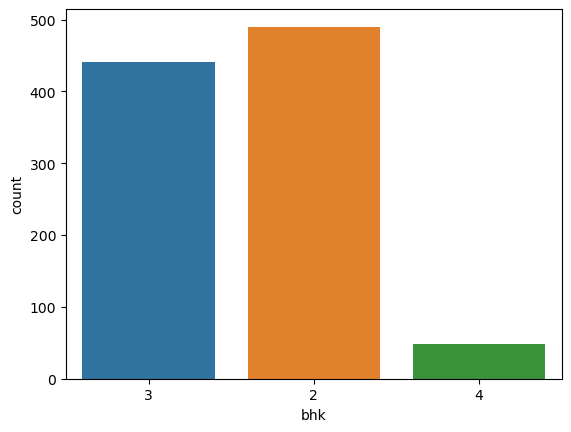

In [31]:
sns.countplot(x='bhk', data=df)

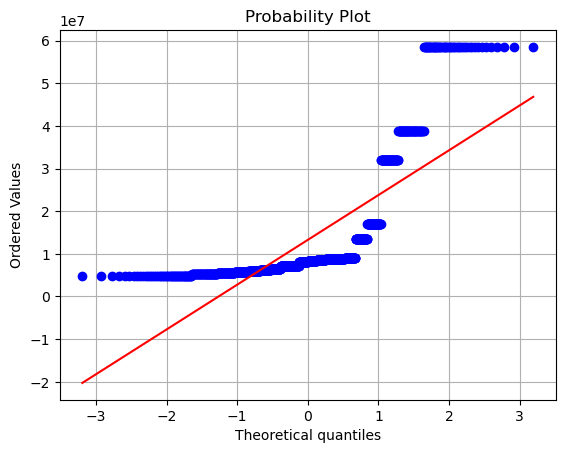

In [32]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df["amount"],dist="norm",plot=plt)
plt.grid()

<Axes: xlabel='amount'>

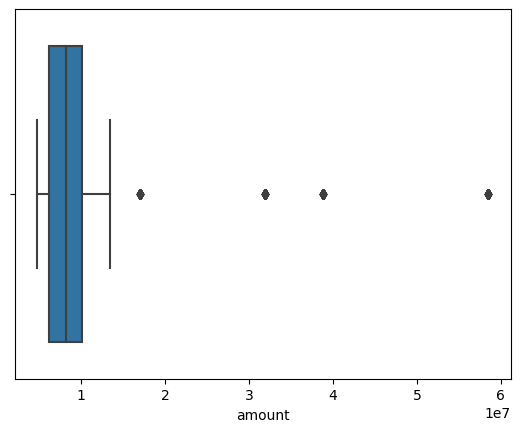

In [34]:
sns.boxplot(x="amount",data=df)

<Axes: xlabel='bhk', ylabel='count'>

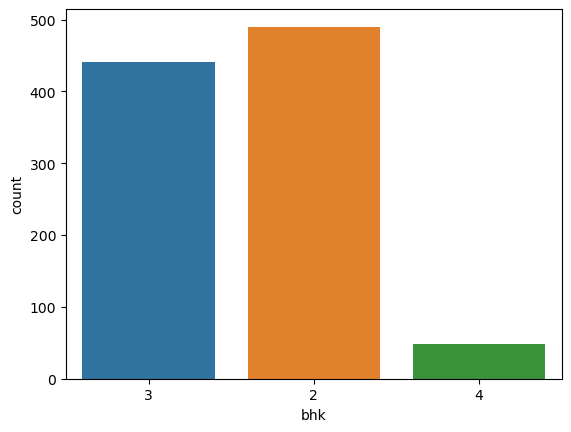

In [51]:
sns.countplot(data=df,x="bhk")

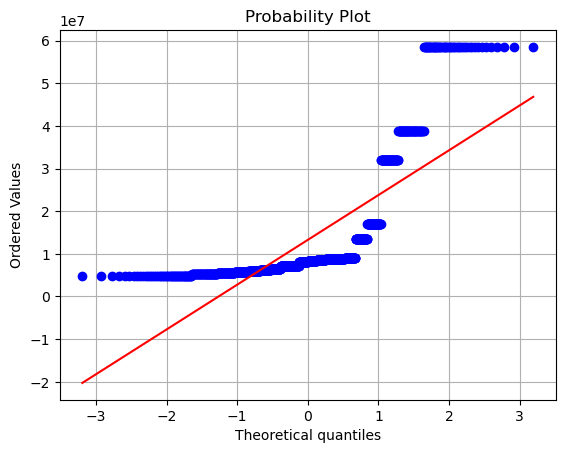

In [53]:
stats.probplot(df["amount"],dist="norm",plot=plt)
plt.grid()

<Axes: xlabel='amount', ylabel='Density'>

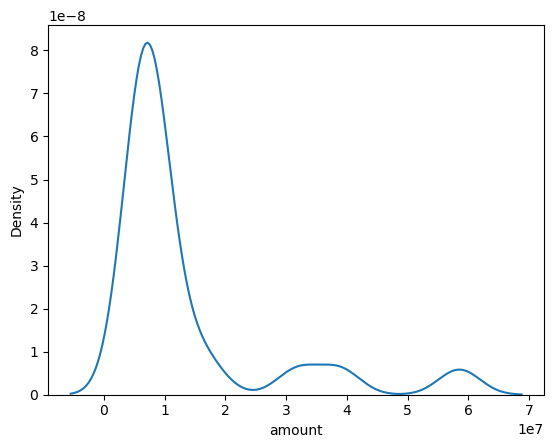

In [54]:
sns.kdeplot(x="amount",data=df)

<Axes: xlabel='status', ylabel='count'>

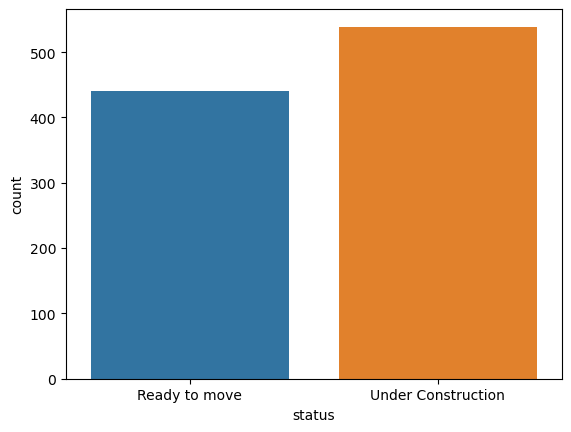

In [55]:
sns.countplot(data=df,x="status")

<Axes: xlabel='area_sq_ft'>

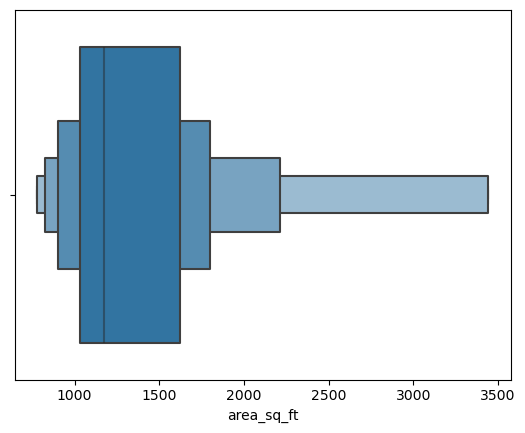

In [56]:
sns.boxenplot(data=df,x="area_sq_ft")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     980 non-null    object
 1   area_sq_ft  980 non-null    int32 
 2   status      980 non-null    object
 3   amount      980 non-null    int32 
 4   bhk         980 non-null    object
dtypes: int32(2), object(3)
memory usage: 30.8+ KB


In [58]:
crosstab = pd.crosstab(df['address'], df['bhk'])

print(crosstab)

bhk                        2   3   4
address                             
Avadi, Chennai             0  49   0
East Tambaram, Chennai    49   0   0
Egmore, Chennai            0   0  49
Guindy, Chennai            0  49   0
Iyyappanthangal, Chennai   0  49   0
Karapakkam, Chennai       49   0   0
Kattupakkam, Chennai      49   0   0
Kolathur, Chennai         98   0   0
Mugalivakkam, Chennai      0  49   0
Nungambakkam, Chennai      0  49   0
Padur, Chennai             0  49   0
Pallavaram, Chennai       49   0   0
Perumbakkam, Chennai      98   0   0
Poonamallee, Chennai       0  49   0
Puzhal, Chennai           49   0   0
Sholinganallur, Chennai    0  49   0
Thiruvanmiyur, Chennai     0  49   0
Vengaivasal, Chennai      49   0   0


<Axes: xlabel='address', ylabel='count'>

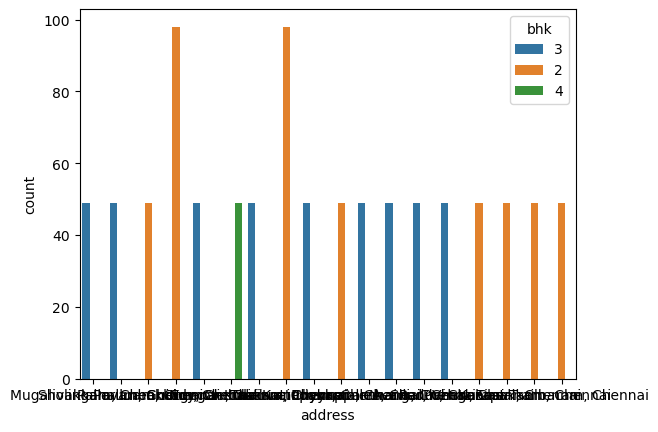

In [67]:
sns.countplot(data=df,x="address",hue="bhk")

In [60]:
crosstab = pd.crosstab(df['status'], df['bhk'])

print(crosstab)

bhk                   2    3   4
status                          
Ready to move       294  147   0
Under Construction  196  294  49


<Axes: xlabel='bhk'>

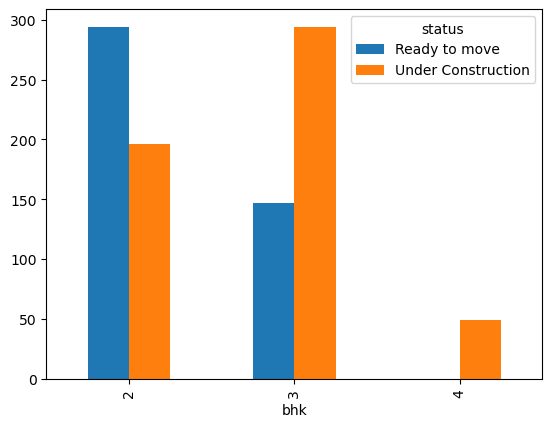

In [65]:
cross_tab=pd.crosstab(df["bhk"],df["status"])
cross_tab.plot(kind="bar")

In [69]:
group = df.groupby('bhk')

group['amount'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
bhk,,,,
2,4796000,8289000,6.360600e+06,6078500.0
3,7043000,38800000,1.591656e+07,9000000.0
4,58500000,58500000,5.850000e+07,58500000.0


<Axes: xlabel='bhk', ylabel='amount'>

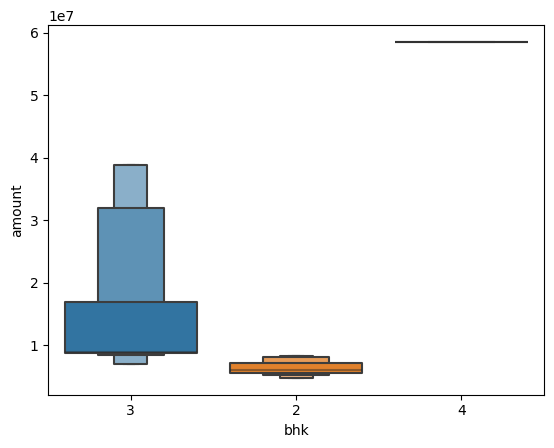

In [77]:
sns.boxenplot(data=df, x='bhk', y='amount')

In [78]:
group = df.groupby('bhk')

group['area_sq_ft'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
bhk,,,,
2,780,1225,1001.300000,1023.0
3,1118,2211,1594.222222,1600.0
4,3442,3442,3442.000000,3442.0


<Axes: xlabel='bhk', ylabel='area_sq_ft'>

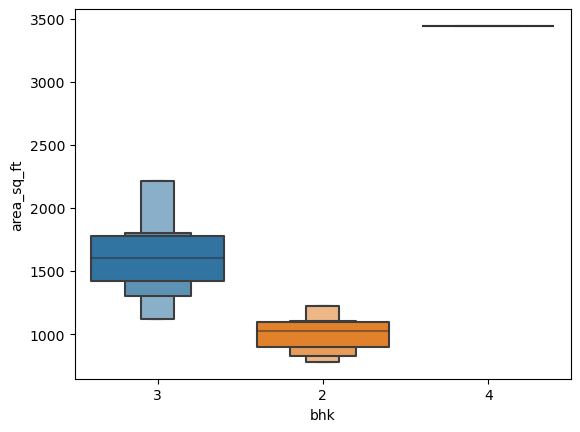

In [79]:
sns.boxenplot(data=df, x='bhk', y='area_sq_ft')

In [80]:
def chi_square(freq_table, significance_level):
    stat, p_val, dof, expected = stats.chi2_contingency(freq_table)
    
    print('stat=%.3f, p=%.3f' % (stat, p_val))
    
    if p_val < significance_level:
        print('Reject null hypothesis (H0): Probably dependent')
    else:
        print('Fail to Reject null hypothesis (H0): Probably independent')


In [81]:
freq_table = pd.crosstab(df_clean['bhk'], df_clean['status'])

freq_table

status,Ready to move,Under Construction
bhk,,
2,294,196
3,49,196


In [82]:
chi_square(freq_table, significance_level=0.05)

stat=103.399, p=0.000
Reject null hypothesis (H0): Probably dependent


In [85]:
freq_table = pd.crosstab(df['bhk'], df['address'])
freq_table

address,"Avadi, Chennai","East Tambaram, Chennai","Egmore, Chennai","Guindy, Chennai","Iyyappanthangal, Chennai","Karapakkam, Chennai","Kattupakkam, Chennai","Kolathur, Chennai","Mugalivakkam, Chennai","Nungambakkam, Chennai","Padur, Chennai","Pallavaram, Chennai","Perumbakkam, Chennai","Poonamallee, Chennai","Puzhal, Chennai","Sholinganallur, Chennai","Thiruvanmiyur, Chennai","Vengaivasal, Chennai"
bhk,,,,,,,,,,,,,,,,,,
2,0,49,0,0,0,49,49,98,0,0,0,49,98,0,49,0,0,49
3,49,0,0,49,49,0,0,0,49,49,49,0,0,49,0,49,49,0
4,0,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
chi_square(freq_table, significance_level=0.05)

stat=1960.000, p=0.000
Reject null hypothesis (H0): Probably dependent
